In [2]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
amzn_ticker = yf.Ticker("AMZN")

amzn = amzn_ticker.history(period="max")

amzn_earn = amzn_ticker.earnings_dates

amzn.head()

AMZN: No price data found, symbol may be delisted (1d 1924-11-18 -> 2023-10-26)


SSLError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /calendar/earnings?symbol=AMZN&offset=0&size=12 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))

In [4]:
amzn.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-19 00:00:00-04:00,130.570007,132.240005,127.470001,128.399994,60961400,0.0,0.0
2023-10-20 00:00:00-04:00,128.050003,128.169998,124.970001,125.169998,56343300,0.0,0.0
2023-10-23 00:00:00-04:00,124.629997,127.879997,123.980003,126.559998,48260000,0.0,0.0
2023-10-24 00:00:00-04:00,127.739998,128.800003,126.339996,128.559998,46477400,0.0,0.0
2023-10-25 00:00:00-04:00,126.040001,126.339996,120.790001,121.389999,74022200,0.0,0.0


In [5]:
amzn.shape

(6656, 7)

We have data from May 1997 to today's date of 25 Oct 2023 - roughly 26 years of data, only on trading days. This is 6656 entries.

In [6]:
# delete unnecessary columns
del amzn['Dividends']
del amzn['Stock Splits']

## Goal - to predict whether price will go up or down tomorrow

In [7]:
# create tomorrow's price column using shift -1 (1 day before) of closing price
amzn['Tomorrow'] = amzn['Close'].shift(-1)

In [8]:
amzn.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.085417
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.081771
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.071354
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.069792


In [9]:
# create a target column to compare if tomorrow's price is greater than today's price
# returns boolean True if price went up
# convert into numeric 1 or 0 using as type 
amzn['Target'] = (amzn['Tomorrow'] > amzn['Close']).astype(int)
amzn.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458,0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.085417,0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.081771,0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.071354,0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.069792,0


## Split train and test data

In [10]:
cutoff_index = int(0.8*len(amzn))
train = amzn.iloc[:cutoff_index]
test = amzn.iloc[cutoff_index:]

## Train test model - RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

In [12]:
predictors = ["Close", "Volume", "Open", "High", "Low"]


In [13]:
X_train = train[predictors]
y_train = train['Target']
X_test = test[predictors]
y_test = test['Target']

In [14]:

rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, random_state=42)

In [15]:
from sklearn.metrics import precision_score

#what percentage of the prediction is accurate

preds = rf.predict(X_test)
preds

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
preds = pd.Series(preds, index=test.index)
preds

Date
2018-07-12 00:00:00-04:00    0
2018-07-13 00:00:00-04:00    0
2018-07-16 00:00:00-04:00    0
2018-07-17 00:00:00-04:00    0
2018-07-18 00:00:00-04:00    0
                            ..
2023-10-19 00:00:00-04:00    1
2023-10-20 00:00:00-04:00    1
2023-10-23 00:00:00-04:00    1
2023-10-24 00:00:00-04:00    1
2023-10-25 00:00:00-04:00    1
Length: 1332, dtype: int32

In [18]:
precision_score(y_test, preds)

0.5223880597014925

In [19]:
combined = pd.concat([y_test, preds], axis=1)
combined.head()

,Target,0
Date,,
2018-07-12 00:00:00-04:00,1,0
2018-07-13 00:00:00-04:00,1,0
2018-07-16 00:00:00-04:00,1,0
2018-07-17 00:00:00-04:00,0,0
2018-07-18 00:00:00-04:00,0,0


<AxesSubplot:xlabel='Date'>

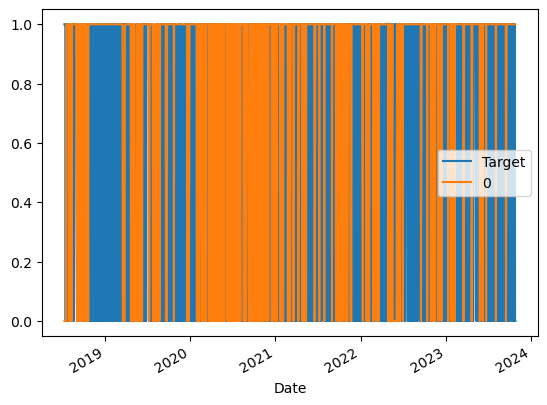

In [20]:
combined.plot()

## Backtesting - Walk-forward Expanding window cross validation method

Create more predictions using different portions of the data to validate accuracy of the model.
- Split data intro training and testing sets using a rolling window
- Train model on portion of the data, make predictions for the next time steps, then shift the window forward.
- Starts with small training window and gradually expand it over time.
- This approach gives more weight to recent data, which is more relevant for forecasting.


In [21]:
def predict(train, test, predictors, model):
    X_train = train[predictors]
    y_train = train['Target']
    X_test = test[predictors]
    y_test = test['Target']
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([y_test, preds], axis=1)
    return combined

In [55]:
#every year has 250 trading days, 
#predict first 10 years (2500 days) then add another year (step=250)
#predict 11 years, then add another year, predict 12 years and so forth
#gives confidence in our model to do multiple testing

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() #start with first 10 years
        test = data.iloc[i:(i+step)].copy() #test on 11th year (i+step) on the first round
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [23]:
predictions = backtest(amzn, rf, predictors)
predictions

,Target,Predictions
Date,,
2007-04-25 00:00:00-04:00,1,0
2007-04-26 00:00:00-04:00,0,0
2007-04-27 00:00:00-04:00,0,1
2007-04-30 00:00:00-04:00,1,1
2007-05-01 00:00:00-04:00,0,1
...,...,...
2023-10-19 00:00:00-04:00,0,1
2023-10-20 00:00:00-04:00,1,0
2023-10-23 00:00:00-04:00,1,0


In [24]:
predictions['Predictions'].value_counts()

0    3227
1     929
Name: Predictions, dtype: int64

In [25]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5091496232508074

In [26]:
# percentage of days where the price actually went up

predictions['Target'].value_counts() / predictions.shape[0]

1    0.519971
0    0.480029
Name: Target, dtype: float64

Backtesting has confirmed our RandomForestClassifier model only has 50% accuracy of predicting the correct direction (up or down) of tomorrow's price, and has performed worse than the benchmark of percentage of price's going up in this dataset.

# Adding predictors to improve accuracy

## Rolling average across various horizons
is the stock price higher than 2 days ago, 5 days ago, 3 months ago, 1 year, 5 years? Has the market gone up a ton, it maybe due for a downturn, and if it has gone down, it may be due to upswing.

In [27]:
amzn_final = amzn.copy()

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = amzn_final.rolling(horizon).mean() #create average of different horizon

    ratio_column = f"Close_Ratio_{horizon}"
    amzn_final[ratio_column] = amzn_final['Close'] / rolling_averages['Close']  #create ratio of any given day closing price over rolling average closing price. Include given day.

    trend_column = f"Trend_{horizon}"
    amzn_final[trend_column] = amzn_final['Target'].shift(1).rolling(horizon).sum() # sum the target value (when price goes up) for days prior to given day based on horizon. Does not include given day.

    new_predictors += [ratio_column, trend_column]  # create new list of predictors

In [28]:
amzn_final.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.085417,0,0.937849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.081771,0,0.993943,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.071354,0,0.978192,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.069792,0,0.931971,0.0,0.843593,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# drop NA 

amzn_final = amzn_final.dropna()

In [30]:
amzn_final.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2001-05-03 00:00:00-04:00,0.8415,0.8500,0.8125,0.8375,100200000,0.8780,1,0.989368,1.0,1.023839,3.0,1.335100,27.0,0.580388,115.0,0.481837,478.0
2001-05-04 00:00:00-04:00,0.8175,0.8800,0.7965,0.8780,131690000,0.8460,0,1.023608,1.0,1.044119,4.0,1.394919,28.0,0.611715,116.0,0.504908,479.0
2001-05-07 00:00:00-04:00,0.8680,0.8765,0.8255,0.8460,101674000,0.8090,0,0.981439,1.0,0.992608,3.0,1.339566,28.0,0.592668,115.0,0.486294,479.0
2001-05-08 00:00:00-04:00,0.8140,0.8245,0.7800,0.8090,143830000,0.7505,0,0.977644,0.0,0.957170,2.0,1.276256,28.0,0.569712,115.0,0.464831,479.0
2001-05-09 00:00:00-04:00,0.7775,0.7830,0.7500,0.7505,93420000,0.7310,0,0.962488,0.0,0.910580,1.0,1.183175,27.0,0.531499,114.0,0.431050,479.0


In [31]:
amzn_final.shape

(5655, 17)

After adding new predictors, there are a number of null values created as a result of lack of historical data based on the horizons used. We dropped these rows and as such, our final data now starts from year 2001 instead of 1997 before, and the number of data now stands at 5655 rows.

## Train test model - RandomForestClassifier 2nd round

In [32]:
rf2 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42)

In [37]:
def predict(train, test, predictors, model):
    X_train = train[predictors]
    y_train = train['Target']
    X_test = test[predictors]
    y_test = test['Target']
    model.fit(X_train, y_train)
    """
    Change preds definition to using predict_proba() to give model more control to predict
    how likely price is going to go up
    """ 
    preds = model.predict_proba(X_test)[:,1]  #predict_proba returns probability of each class i.e. prob of 0 and 1, we only take prob of 1 (index 1)
    preds[preds >= 0.6] =1  #if there is greater than 60% (instead of usual 50%) chance price will go up, model will return price will go up  
    preds[preds < 0.6] =0   #model has to be more confident that price will go up before confirming its prediction. This will return lesser results, but higher confidence, which is what we want because we don't want to trade everyday
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([y_test, preds], axis=1)
    return combined

In [38]:
predictions = backtest(amzn_final, rf2, new_predictors)

In [39]:
precision_score(predictions["Target"], predictions['Predictions'])

0.5

## Train test model - XGBoost

In [40]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 4.7 MB/s eta 0:00:00


In [41]:
from xgboost import XGBClassifier

In [48]:
xgb = XGBClassifier(n_estimators=200, random_state=42)

In [53]:
predictions = backtest(amzn_final, xgb, new_predictors)

In [54]:
precision_score(predictions["Target"], predictions['Predictions'])

0.5364238410596026

In [56]:
amzn.earnings_dates

AttributeError: 'DataFrame' object has no attribute 'earnings_dates'